<a href="https://colab.research.google.com/github/Khang2561/Titanic_predict/blob/main/project(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project: Titanic - Machine learning for disaster

####1. Read file

In [ ]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read file train and test
path = "/content/drive/MyDrive/Colab_Notebooks/train.csv.csv"
train_df = pd.read_csv(path)

path = "/content/drive/MyDrive/Colab_Notebooks/test.csv"
test_df = pd.read_csv(path)


In [ ]:
# column info train file
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#column info test file
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Note :      
* SibSp: # of siblings/ spouses aboard the Titanic
* Parch : # of parents / children aboard the Titanic
* Ticket : ticket number
* Cabin : Cabin number

In [ ]:
#preview train data
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#preview test data
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


####2. clean file

In [ ]:
#set passengerID column as index column
train_df.set_index(train_df['PassengerId'],inplace =True)
train_df.drop('PassengerId',axis = 1, inplace = True)
#train_df = pd.read_csv(path,index_col ="PassengerId")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#info data columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
#info data columns
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Categorical : Survived, sex, embarked,pclass(ordinal),SibSp,Parch
* Numerical : age, fare (discrete)
* Mix types of data : Ticket, Cabin
* Contain Error: Name
* Blank or Null : Cabin > Age > Embarked

In [ ]:
#change Dtype
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features) :
  for feature in features :
    df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [ ]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [ ]:
#after change Dtype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


In [ ]:
#statistics age,fare column
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
# category column statistic
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


####Exploretory Data Analysis

In [ ]:
train_df["Survived"].value_counts().to_frame()#number people survived

,Survived
0,549
1,342


In [ ]:
train_df["Survived"].value_counts(normalize = 'True').to_frame()*100#percent people survived


,Survived
0,61.616162
1,38.383838


In [ ]:
train_df['Sex'].value_counts(normalize ='True').to_frame()*100 #percent man and women in titanic

,Sex
male,64.758698
female,35.241302


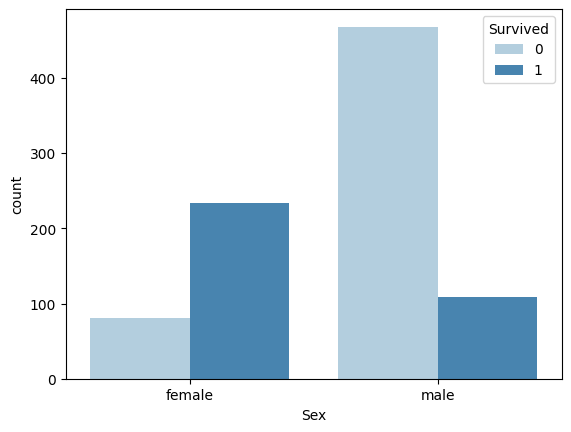

In [ ]:
sns.countplot(data = train_df,x='Sex',hue='Survived',palette = 'Blues');#percent survived between man and women

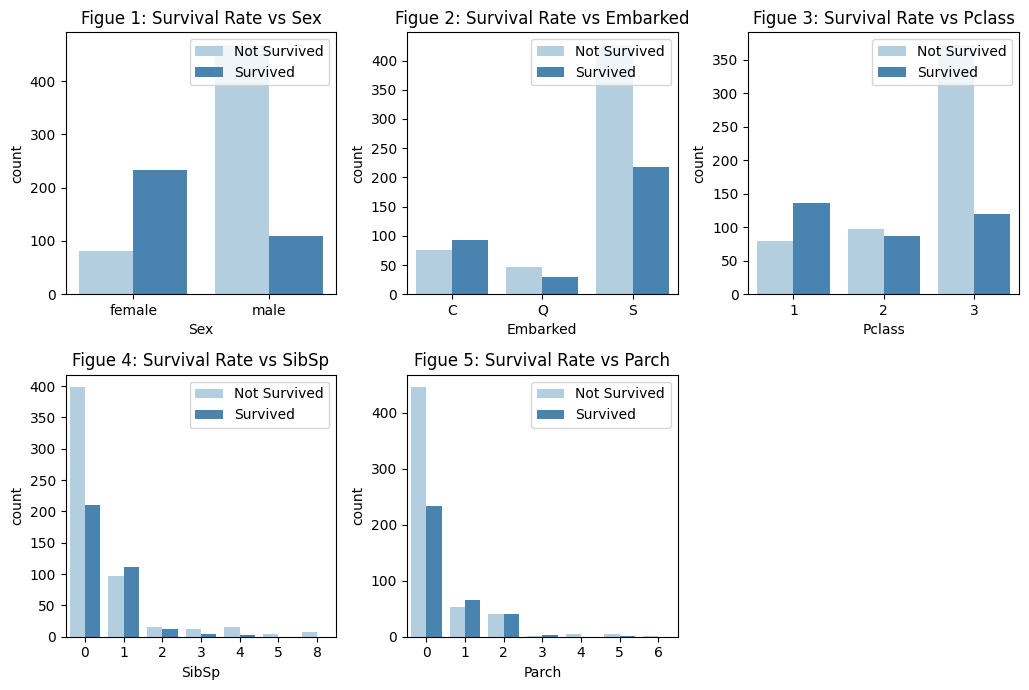

In [ ]:
#survival rate according to category column
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0, n_rows):
  for c in range(0,n_cols):
    i = r*n_cols+c
    if i<len(cols):
      ax_i =ax[r,c]
      sns.countplot(data=train_df,x=cols[i],hue="Survived",palette="Blues",ax = ax_i)
      ax_i.set_title(f"Figue {i+1}: Survival Rate vs {cols[i]}")
      ax_i.legend(title='',loc = 'upper right',labels=['Not Survived','Survived'])

plt.tight_layout()

ax.flat[-1].set_visible(False)

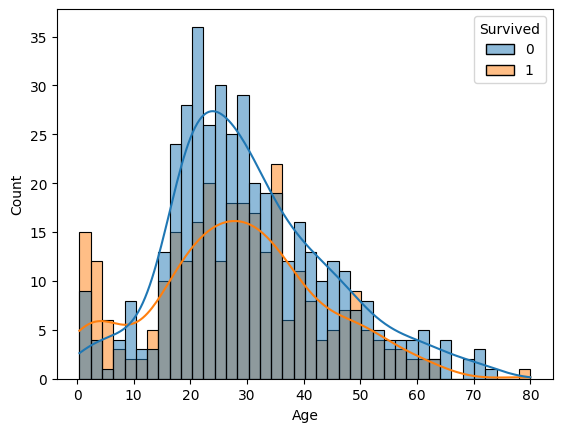

In [ ]:
#survival rate according to age column
sns.histplot(data = train_df, x = 'Age',bins=40,hue = 'Survived',kde = True);

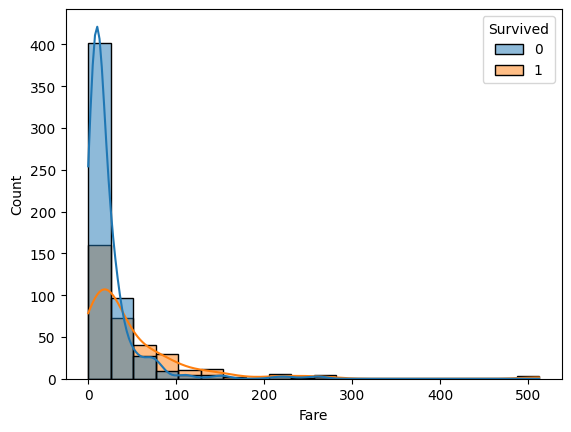

In [ ]:
#survival rate according to fare column
sns.histplot(data = train_df, x = 'Fare',bins=20,hue = 'Survived',kde = True);

In [ ]:
#fare column statistic
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
#to name for 0-25%,25-50,50-70,75-100
fare_categories = ['Economic','Standard','Expensive','Luxury']
quartitle = pd.qcut(train_df['Fare'],4,labels = fare_categories)#add quartitle column
quartitle

PassengerId
1       Economic
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891     Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']

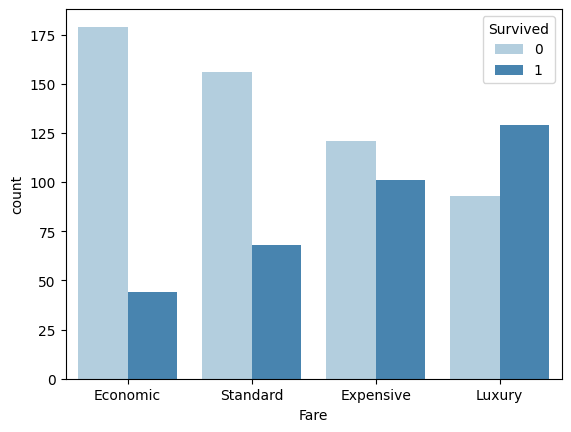

In [ ]:
#survival rate chart  according to quartitle
sns.countplot(x=quartitle,hue = train_df['Survived'],palette = 'Blues');

###Feature Engineering & data wrangling

In [ ]:
#show name column
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
#*regular expession
import re #regular expession
def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")#separate the title from the name
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [ ]:
#title column statistic
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
#train_df[train_df['Name'].str.contains('Mrs. Martin ')]['Name']

In [ ]:
#group by tittle
def group_title (title):
  if title in ['Mr','Mrs','Miss','Master']:
    return title
  elif title =='Ms':
    return "Miss"
  else :
    return str('Orther')

In [ ]:
#apply function for train and test table
train_df['Title'] = train_df['Title'].apply(lambda title : group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title : group_title(title))

In [ ]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Orther     26
Name: Title, dtype: int64

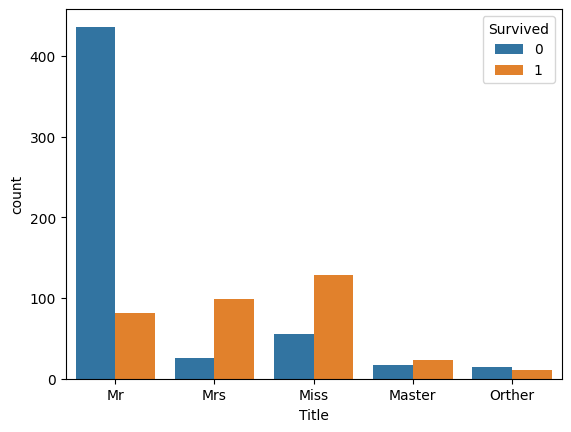

In [ ]:
#survival rate chart according to title
sns.countplot(data = train_df,x = 'Title',hue = 'Survived');

In [ ]:
#add family_size column into train and test column
#family_size = SibSp + Parch + 1
train_df['Family_Size'] = train_df['SibSp'].astype('int')+ train_df['Parch'].astype(int)+1
test_df['Family_Size'] = test_df['SibSp'].astype('int')+ test_df['Parch'].astype(int)+1

In [ ]:
#add family_Cat (famaly category) column into train and test table
train_df['Family_Cat']=pd.cut(train_df['Family_Size'],bins = [0,1,4,6,20],labels=['Solo','Small','Medium','Large'] )
test_df['Family_Cat']=pd.cut(test_df['Family_Size'],bins = [0,1,4,6,20],labels=['Solo','Small','Medium','Large'] )

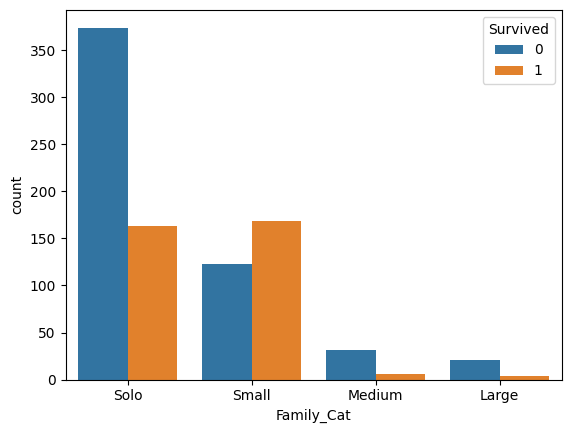

In [ ]:
#survival rate chart according to family_cat column
sns.countplot(data = train_df,x = 'Family_Cat',hue = 'Survived');

###Data Wrangling

In [ ]:

num_features = ['Age', 'Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features +cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [ ]:
# missing value rate from train and test table
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count*100/n_rows:.2f} % missing values.")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87 % missing values.
Embarked has 0.22 % missing values.
Age has 20.57 % missing values.
Fare has 0.24 % missing values.


###Filling missing values

In [ ]:
# The average age arccording to sex and pclass value
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']
age_by_sex_pclass

<ipython-input-39-e1d1da5bcd20>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# fill the average value into missing age value
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-40-6b10db32d4ac>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
<ipython-input-40-6b10db32d4ac>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(['S

In [ ]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22 % missing values.
Fare has 0.24 % missing values.


In [ ]:
x = train_df[feature_cols]
y = train_df['Survived']


In [ ]:
X_test =test_df[feature_cols]

In [ ]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [ ]:
X = preprocessor.transform(x)#X -> X_train, X_val

In [ ]:
X_test =preprocessor.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train,y_val = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
X_test.shape

(418, 19)

In [ ]:
#binary classification
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear',max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.8435754189944135